## Final Group Project

- Lolyna de la Fuente Ordaz
- Ibrahim Mohammed Hamed
- Chukwuebuka Ozoh

### 1. Exploratory Data Analysis (EDA)

#### Data Loading and Inspection

In [2]:
# Libraries and Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


#### Load the Titanic dataset into a pandas Data Frame

In [3]:
# Reading our database
df = pd.read_csv("Titanic-Dataset.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### Display the first few rows of the dataset to understand its structure.

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
# Understanding its contents
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# Check for Shape
df.shape

(891, 12)

#### Visualizations

##### Boxplot

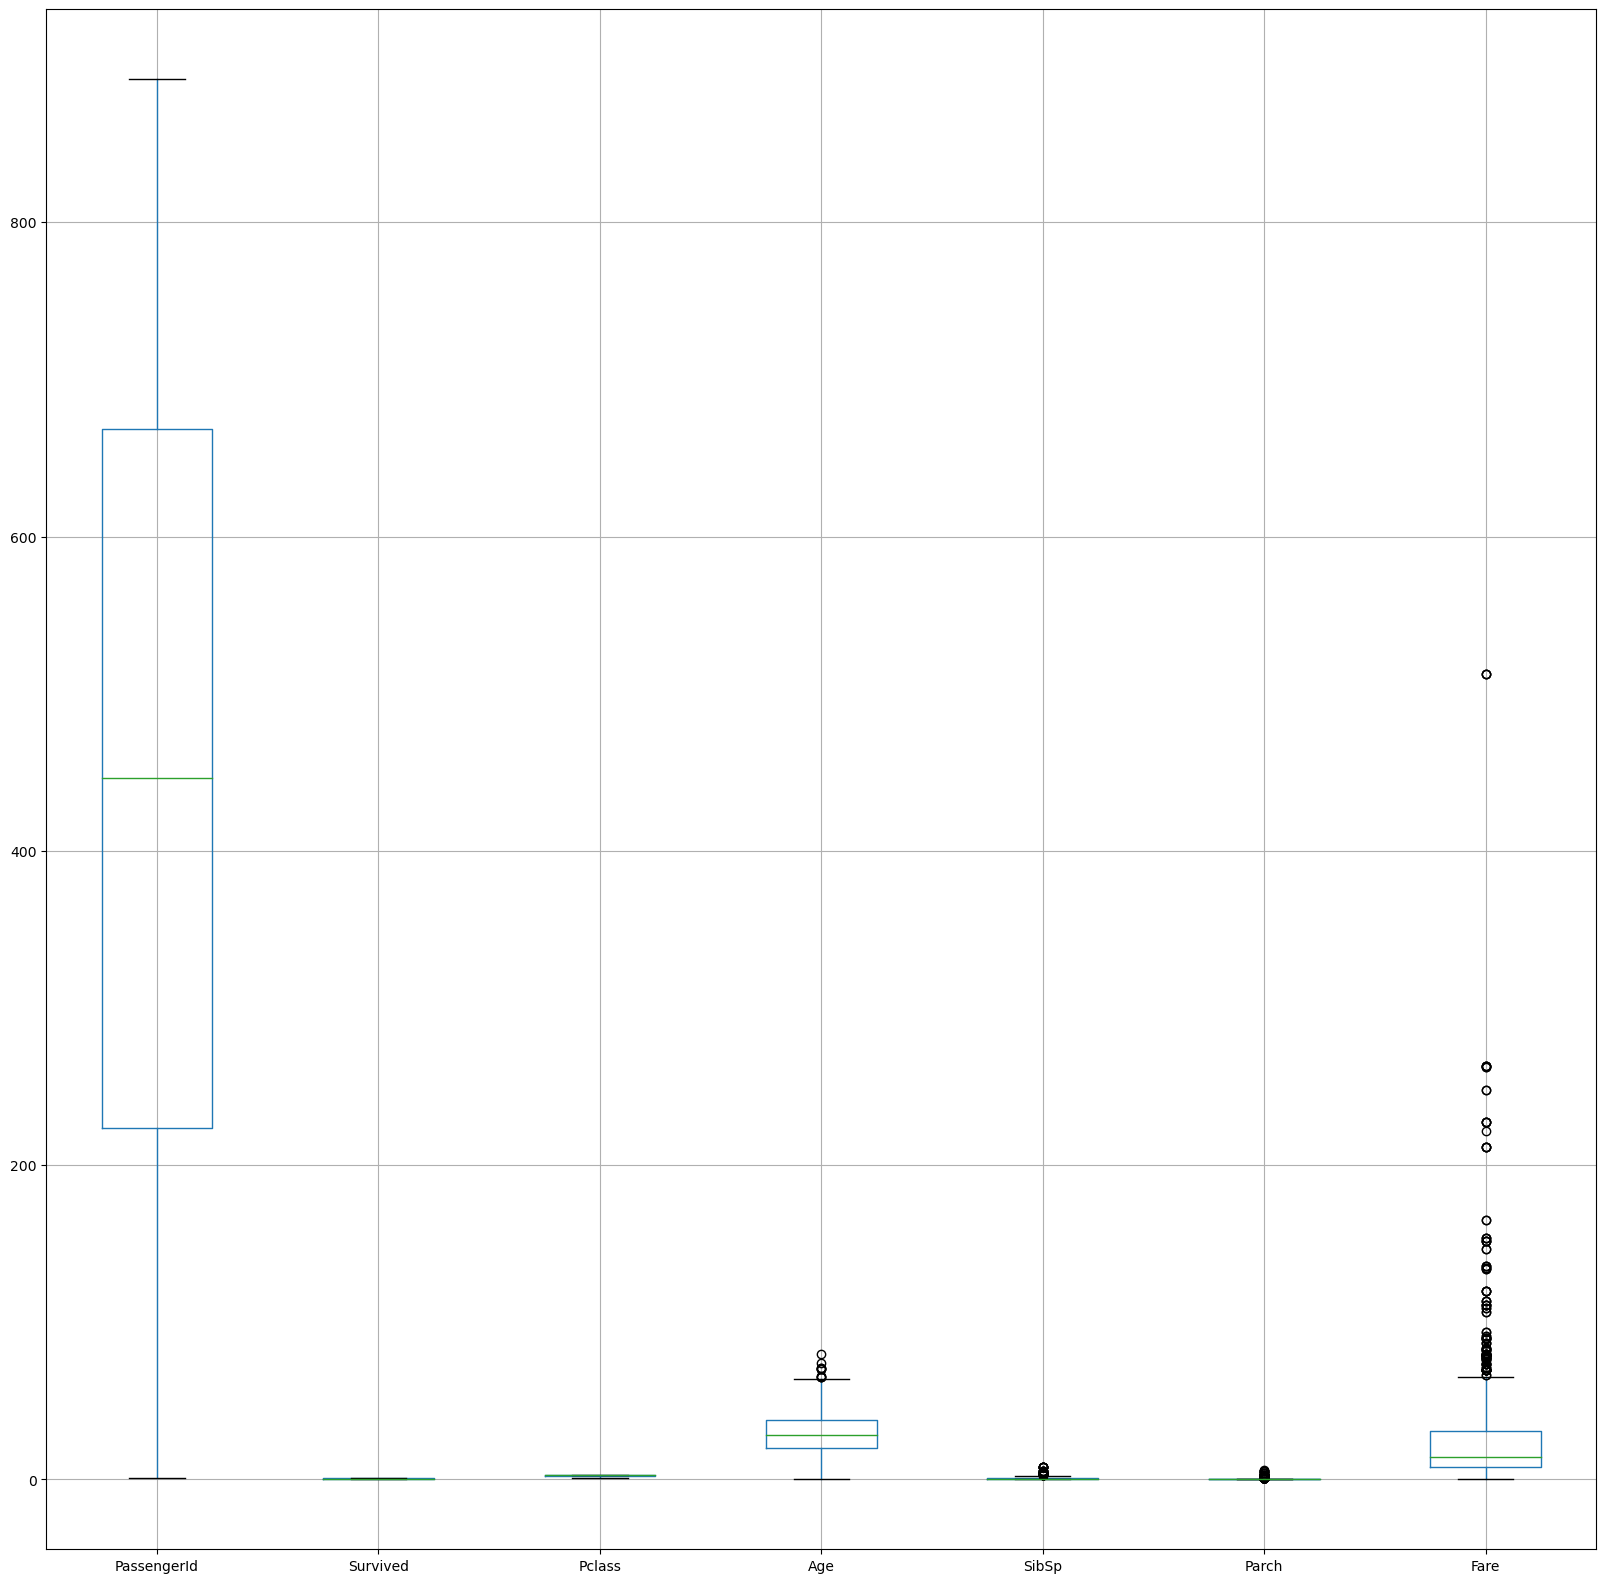

In [8]:
#Identifying Outliers
box1=df.boxplot(figsize= (20,20))

##### Histogram

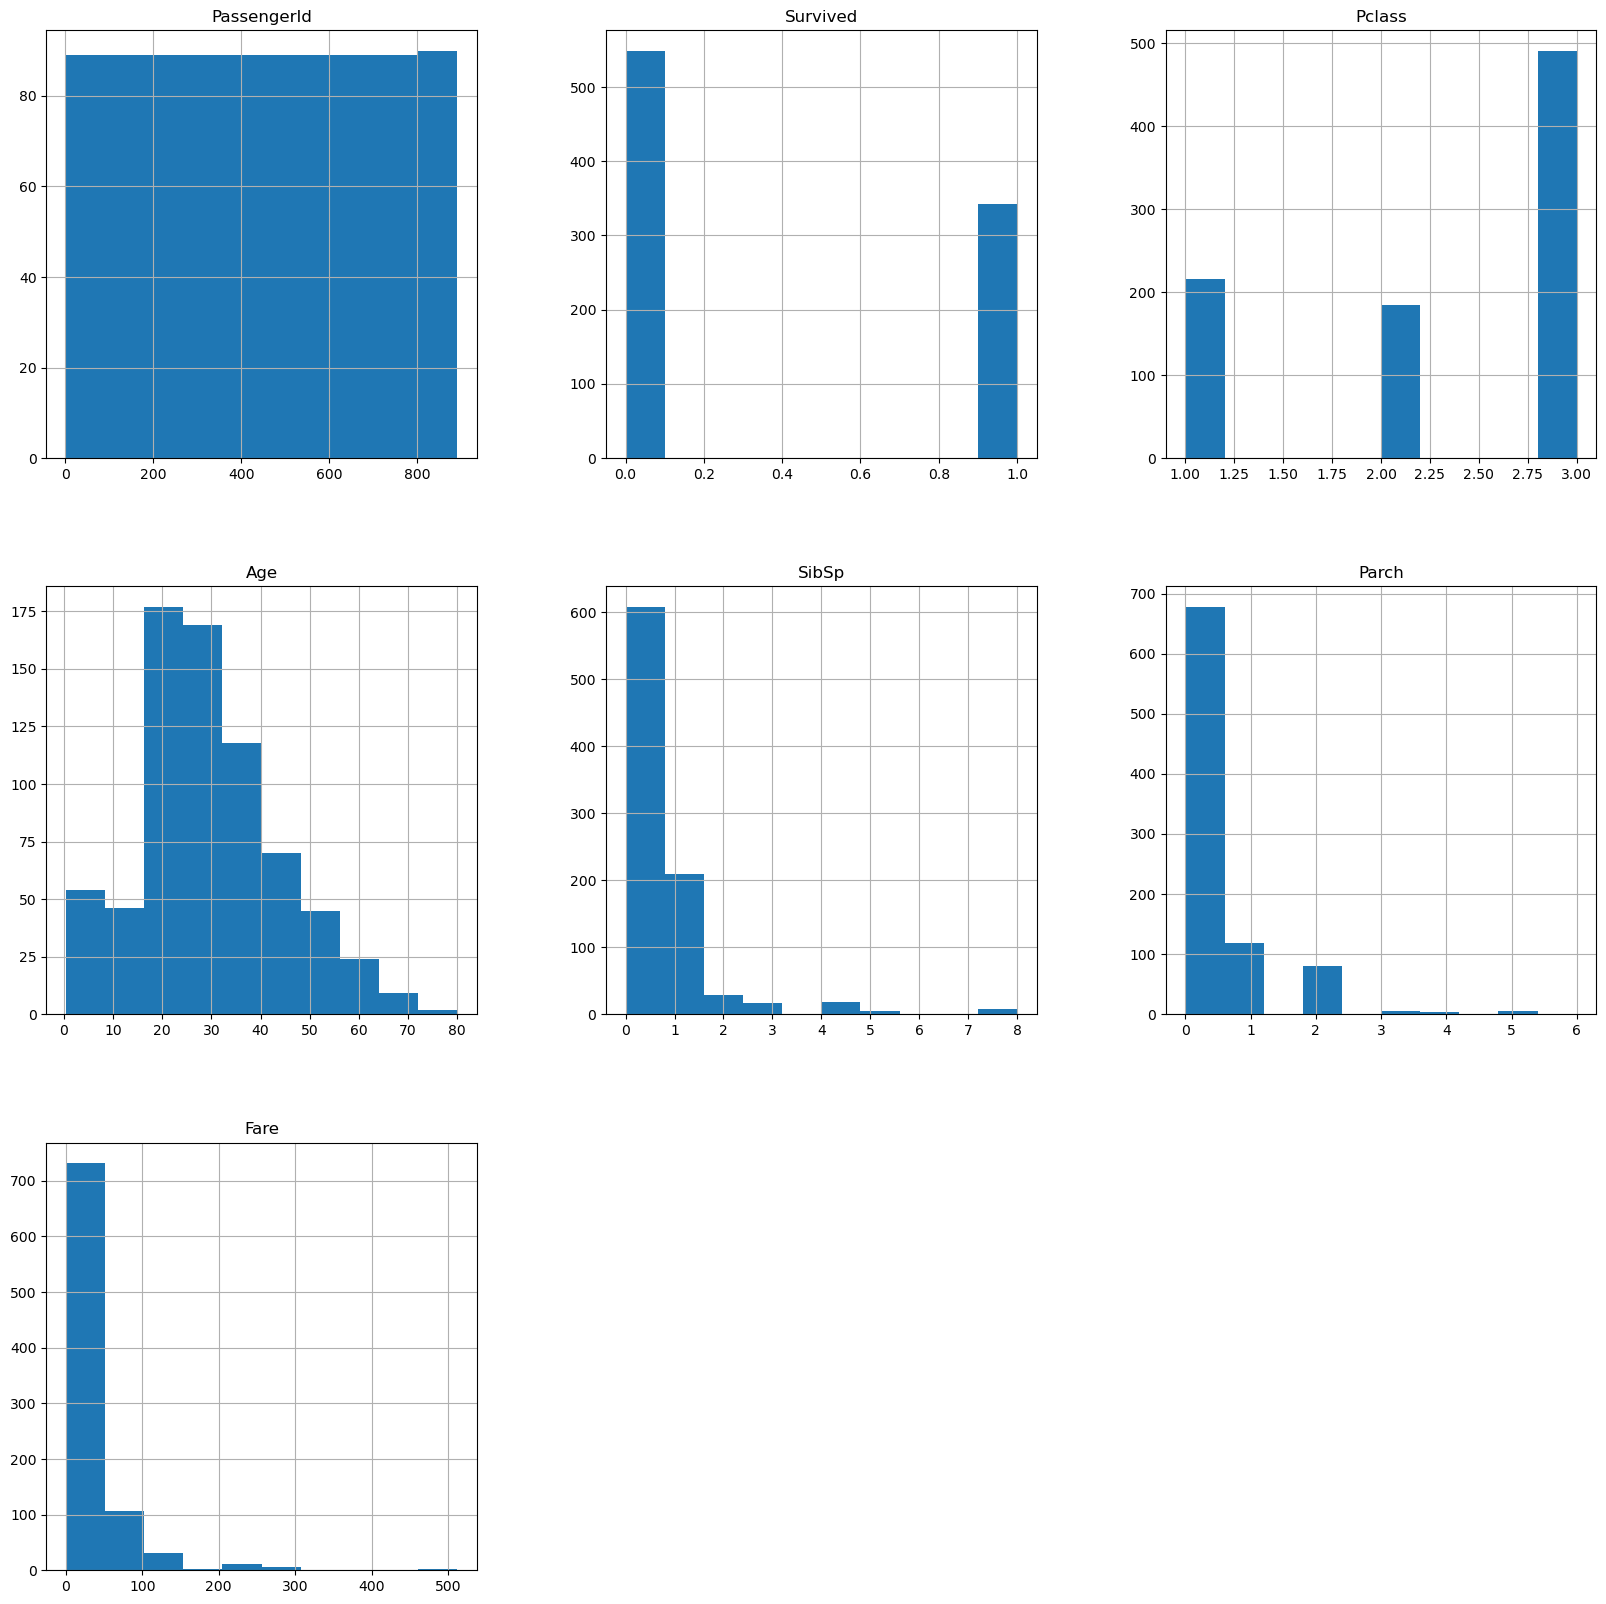

In [9]:
#Histogram for each variable
hist = df.hist(figsize=(20,20))
plt.show()

##### PairPlot

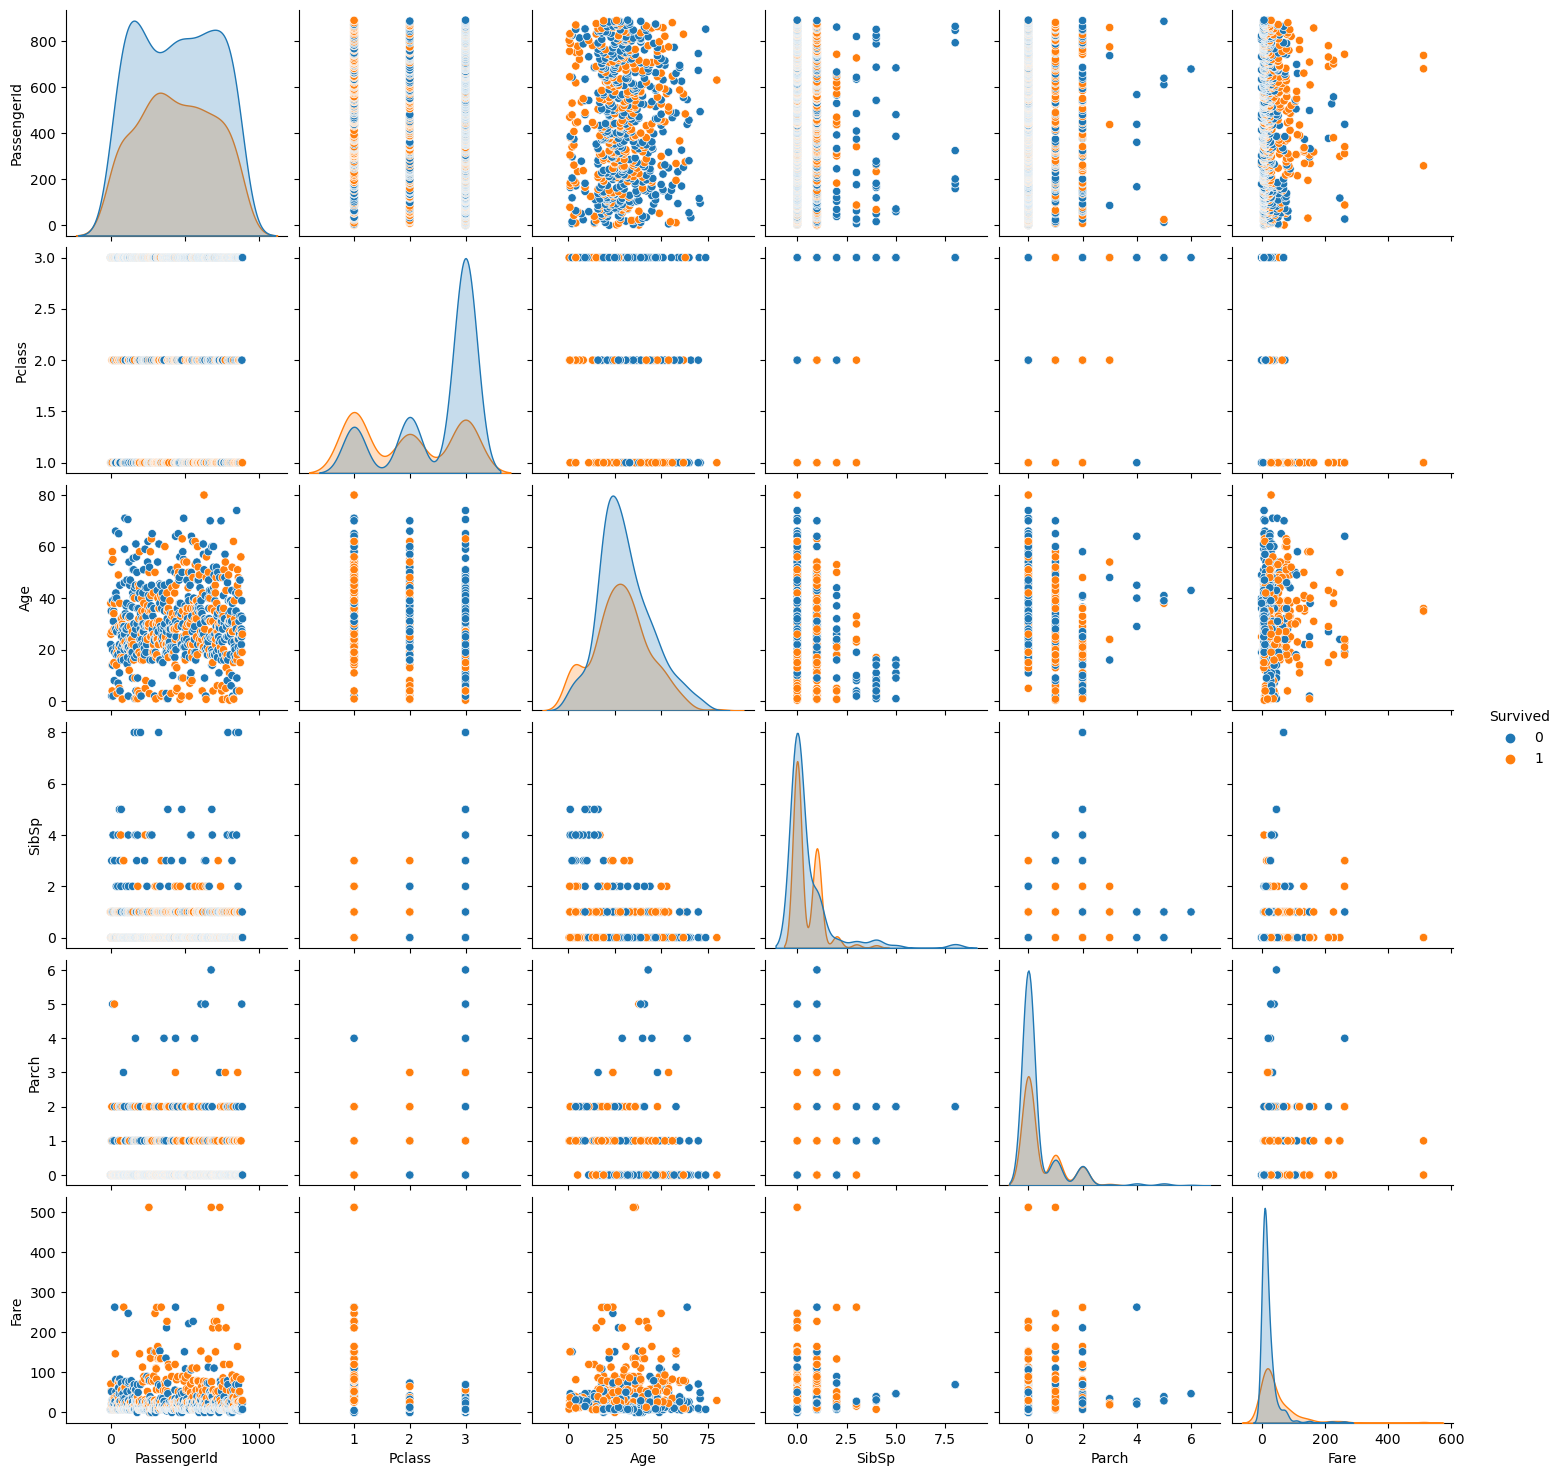

In [10]:
sns.pairplot(data = df, hue = 'Survived')

### 2. Data Pre-processing

#### Check for any missing values in the dataset.

In [11]:
# Checking for total null values in the database
print('Total Null Values:')
print(df.isnull().sum().sum())

Total Null Values:
866


#### Identify columns with missing values

In [12]:
# Checking for null values in the database
print('NaN in columns:')
nc= df.isnull().sum(axis = 0)
print(nc, '\n')

print('NaN in rows:')
print(df.isnull().sum(axis = 1))

NaN in columns:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 

NaN in rows:
0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    2
889    0
890    1
Length: 891, dtype: int64


#### Decide on an appropriate strategy to handle missing values (e.g., imputation or removal).

There's only 3 columns with missing values: 
- Age: For the 177 missing values, I decided to replace them with the mean.
- Cabin: Since we have 891 rows and 687 are with missing values, I decided to remove this column as it doesn't affect our predictions at all. 
- Embarked: Only two missing values which will be replace with the mode.

#### Implement the chosen strategy and justify the decision.

##### Replacing Age with Mean

In [13]:
# We find the stats for the Age column
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

I decided to replace the missing values with the mean, as an int, since our Age variables are written as whole numbers.

In [14]:
# As we can see our row number 6 has a missing value so we should check for its replacement later on
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [15]:
# Ensures we fill all Age NaNs with the columns mean as an integer which is (29.0)
df['Age'].fillna(int(df['Age'].mean()), inplace=True)

# As we can see our row number 6 now has 29.0
df['Age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    29.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

##### Removing Cabin Column

In [16]:
# We print the first 10 results for Cabin column
df['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

I decided to remove all the column since the values in it were not relevant for our analysis.

In [17]:
# We use the drop method and axis = 1 because its a column
df = df.drop('Cabin', axis=1)

# We print our first 10 results to check the column has been eliminated
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


##### Replacing Embarked with Mode

In [18]:
# We print the count of the three categories for the Embarked column
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

I decided to replace the 2 missing values with the category which has the most value counts: S which means most people embarked in Southampton.

In [19]:
df['Embarked'].fillna('S', inplace=True)

#### Final Null Values Check After Modifications

In [20]:
print('NaN in columns:')
nc= df.isnull().sum(axis = 0)
print(nc, '\n')

NaN in columns:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64 



We now have 0 missing values in our dataset, which now makes it easier for further analysis.

#### Categorical Variable Encoding

##### Identify categorical variables in the dataset

In [21]:
list(set(df.columns) - set(df.describe().columns))

['Ticket', 'Embarked', 'Name', 'Sex']

In [22]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [23]:
df['Name'].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [24]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [25]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

##### Choose an encoding method for categorical variables (e.g., one-hot encoding or label encoding)

###### One-Hot Encoding for Sex Category

In [26]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
def convert_to_binary(value):
    if value == 'male':
        return 1
    elif value == 'female':
        return 0
    else:
        return None 

df['Sex'] = df['Sex'].apply(convert_to_binary)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,C


###### Label Encoder for Embarked Category

In [28]:
df['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [29]:
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
df['Embarked']= label_encoder.fit_transform(df['Embarked']) 
  
print(df['Embarked'].unique())

# Southampton (S) = 2, Queenstown (Q) = 1, Cherbourg (C) = 0
df.head(10)

[2 0 1]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2
5,6,0,3,"Moran, Mr. James",1,29.0,0,0,330877,8.4583,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,2
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,0


#### Scaler

In [30]:
sdf = df.copy()
std_scale = preprocessing.StandardScaler().fit(sdf[['Age', 'Fare']])
sdf[['Age', 'Fare']] = std_scale.transform(sdf[['Age', 'Fare']])

### 3. Feature Engineering

#### Create a new feature that represents family size (sum of siblings/spouses and parents/children).

In [31]:
sdf['FamilySize'] = sdf['SibSp'] + sdf['Parch'] + 1

sdf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,-0.581659,1,0,A/5 21171,-0.502445,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0.649327,1,0,PC 17599,0.786845,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,-0.273913,0,0,STON/O2. 3101282,-0.488854,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,0.418517,1,0,113803,0.420730,2,2
4,5,0,3,"Allen, Mr. William Henry",1,0.418517,0,0,373450,-0.486337,2,1
5,6,0,3,"Moran, Mr. James",1,-0.043103,0,0,330877,-0.478116,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,1.880313,0,0,17463,0.395814,2,1
7,8,0,3,"Palsson, Master. Gosta Leonard",1,-2.120392,3,1,349909,-0.224083,2,5
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,-0.196976,0,2,347742,-0.424256,2,3
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,-1.197152,1,0,237736,-0.042956,0,2


#### Explore if this new feature correlates with the survival of passengers.

<AxesSubplot:title={'center':'Survived by family size'}, xlabel='FamilySize'>

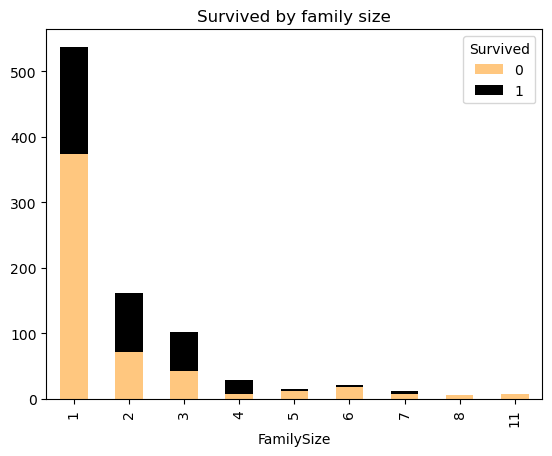

In [74]:
pd.crosstab(sdf['FamilySize'], sdf['Survived']).plot(kind='bar', stacked=True, title="Survived by family size", colormap= 'copper_r')

<AxesSubplot:title={'center':'Survived by family size (%)'}, xlabel='FamilySize'>

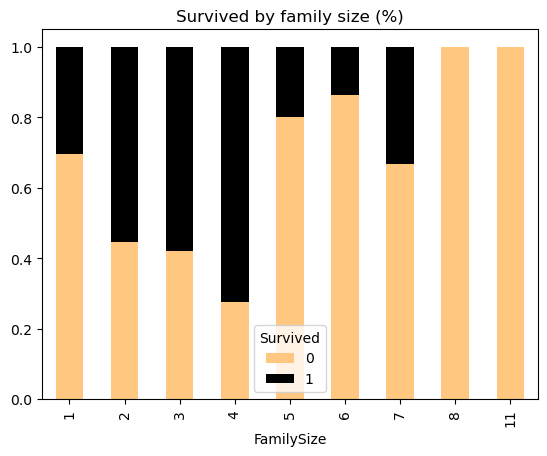

In [75]:
pd.crosstab(sdf['FamilySize'], sdf['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)", colormap= 'copper_r')

What these visuals tell us is that while family size increases, the survival rate decreases.

### 4. Conditional Visualization Points Based on Titanic Dataset

#### Correlation Between Features

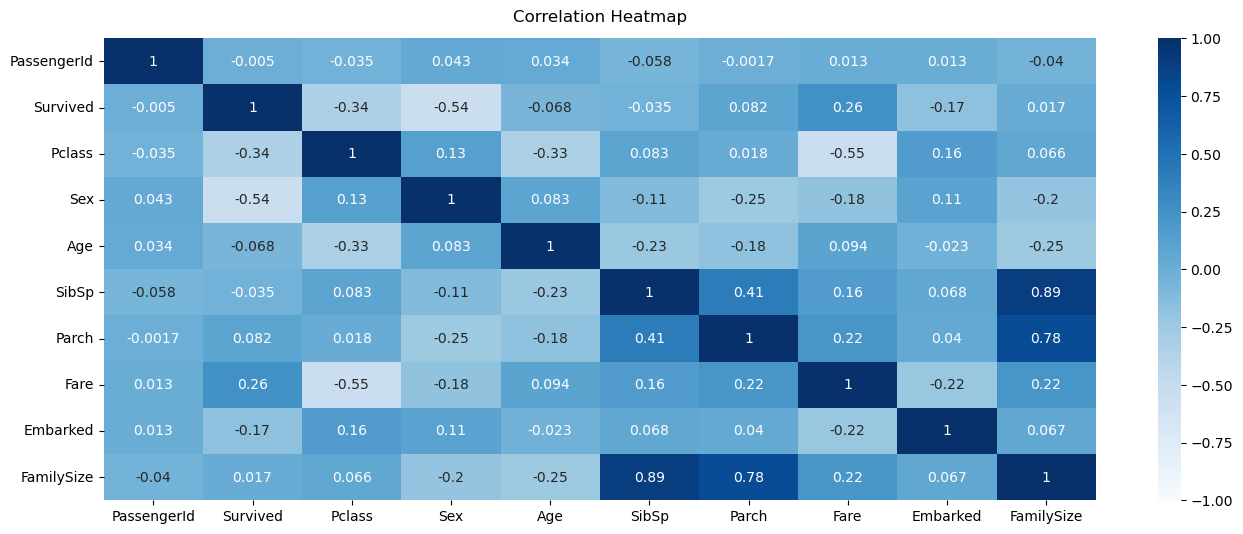

In [78]:
# Use a heatmap to visualize the correlation between different features in the dataset
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(sdf.corr(), vmin=-1, vmax=1, annot=True, cmap= 'Blues')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

#### Distribution of Passengers Across Different Classes

<AxesSubplot:title={'center':'Passengers Across Classes'}, xlabel='Pclass'>

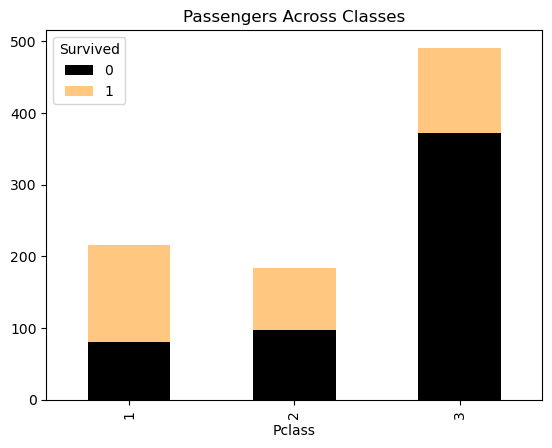

In [86]:
pd.crosstab(sdf['Pclass'], sdf['Survived']).plot(kind='bar', stacked=True, title="Passengers Across Classes", colormap= 'copper')

#### Fare Distribution for Passengers in Different Classes

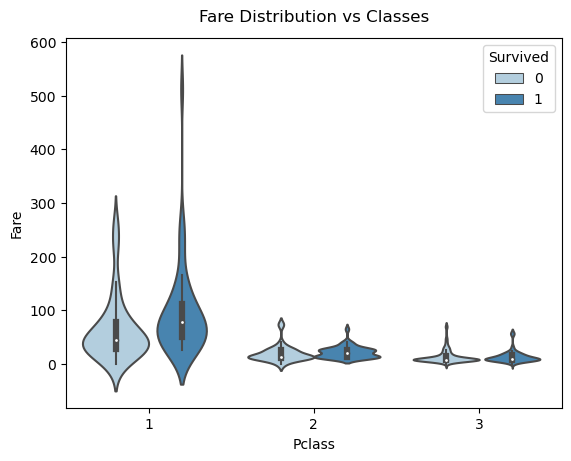

In [87]:
vp = sns.violinplot(data=df, x="Pclass", y="Fare", hue="Survived", palette= 'Blues')

vp.set_title('Fare Distribution vs Classes', fontdict={'fontsize':12}, pad=12);

#### Count of Non-Surviving Passengers Between Ages 20-30

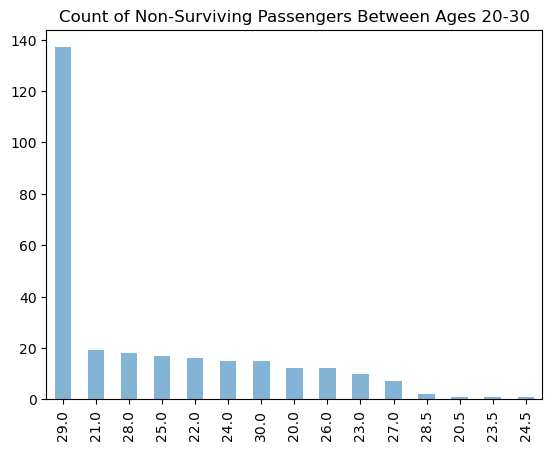

In [37]:
age = df[(df['Age'] <= 30) & (df['Age'] >= 20)& (df['Survived'] == 0)]
age.Age.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Count of Non-Surviving Passengers Between Ages 20-30");

In [38]:
age.Age.value_counts()

29.0    137
21.0     19
28.0     18
25.0     17
22.0     16
24.0     15
30.0     15
20.0     12
26.0     12
23.0     10
27.0      7
28.5      2
20.5      1
23.5      1
24.5      1
Name: Age, dtype: int64

#### Count of Passengers in Each Class

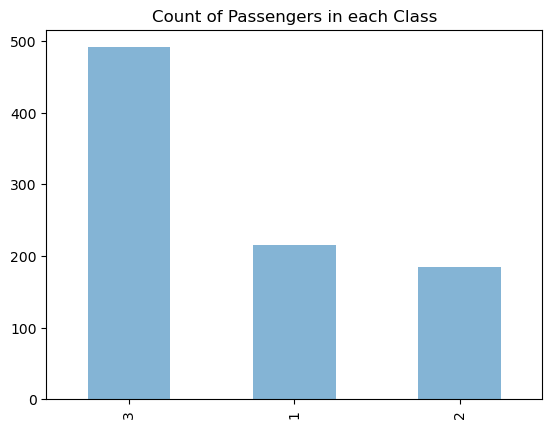

In [39]:
sdf.Pclass.value_counts().plot(kind='bar', alpha=0.55)
plt.title("Count of Passengers in each Class");

In [40]:
sdf.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

### 5. Models for Analysis

#### Train & Test Split

In [41]:
# Split the dataset into training and testing sets.
X = sdf.iloc[:,[2,4,5,6,7,9,10,11]]
y = sdf.iloc[:,1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

#### Random Forest and Decision Tree Classifiers

##### Random Forest

In [42]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [43]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf_classifier.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred_rf)
print("Accuracy:", accuracy)

Accuracy: 0.7873134328358209


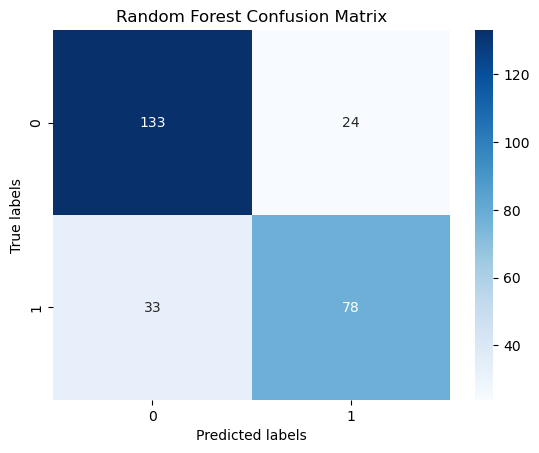

In [46]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest Confusion Matrix')
plt.show()

##### Decision Tree Classifier

In [47]:
dt_classifier = DecisionTreeClassifier(random_state=42)

In [48]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [49]:
y_pred_dt = dt_classifier.predict(X_test)

In [50]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)

Decision Tree Accuracy: 0.7350746268656716


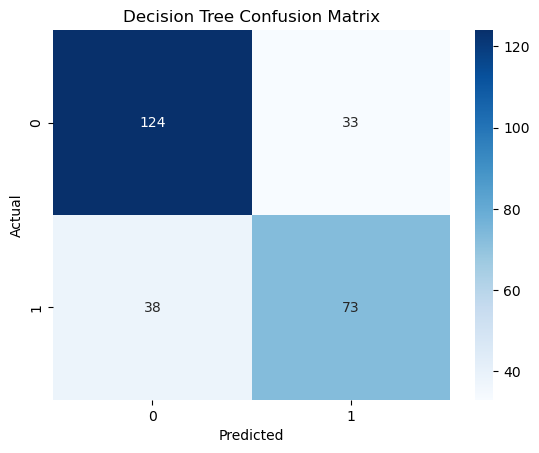

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="g", cmap="Blues")
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Classification Reports of Random Forest and Decision Tree Classifiers

In [52]:
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.70      0.73       111

    accuracy                           0.79       268
   macro avg       0.78      0.77      0.78       268
weighted avg       0.79      0.79      0.79       268



In [53]:
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.79      0.78       157
           1       0.69      0.66      0.67       111

    accuracy                           0.74       268
   macro avg       0.73      0.72      0.73       268
weighted avg       0.73      0.74      0.73       268



#### Logistic Regression and K-Nearest Neighbors

##### Logistic Regression

In [54]:
#Model Training 
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [55]:
# Model Evaluation 
y_pred_lr = logreg.predict(X_test)

In [56]:
print("Accuracy:", accuracy_score(y_test, y_pred_lr))

Accuracy: 0.8134328358208955


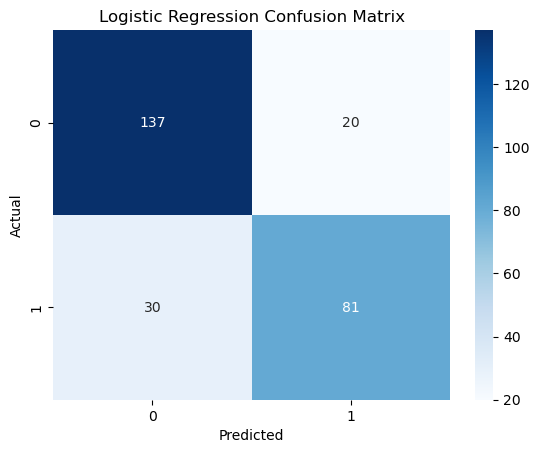

In [57]:
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="g", cmap="Blues")
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### K-Nearest Neighbors

In [58]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
# KNN Predictions
knn_predictions = knn_model.predict(X_test)

In [60]:
# Calculate the accuracy for KNN
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f'KNN Accuracy: {knn_accuracy:.2f}')

KNN Accuracy: 0.75


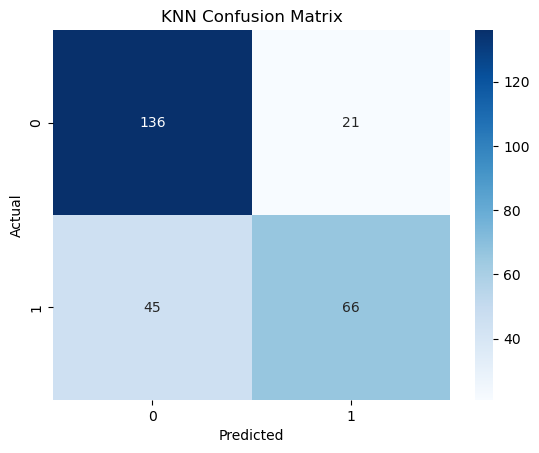

In [61]:
# Visualize the KNN Confusion Matrix
sns.heatmap(confusion_matrix(y_test, knn_predictions), annot=True, fmt='g', cmap="Blues")
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

##### Classification Reports of Logistic Regression and KNN Classifiers

In [62]:
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       157
           1       0.80      0.73      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [63]:
# Classification report for KNN
print('KNN Classification Report:')
print(classification_report(y_test, knn_predictions))

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.87      0.80       157
           1       0.76      0.59      0.67       111

    accuracy                           0.75       268
   macro avg       0.76      0.73      0.74       268
weighted avg       0.75      0.75      0.75       268

